#The (K-) Nearest Neighbor classifier

The simplest machine learning classifier is the Nearest Neighbor.
The key idea behind this classifier is to classify a new sample according to its closest training sample.

Each time we have to classify a new sample, we compute its distance from training samples and take the minimum. The predicted class of the new sample will be the class of the closest training sample.

More generarly, the K-NN considers K (3 in the figure) closest training samples.
The predicted class of the new sample will be the result of the majority vote of the K nearest training sample classes.

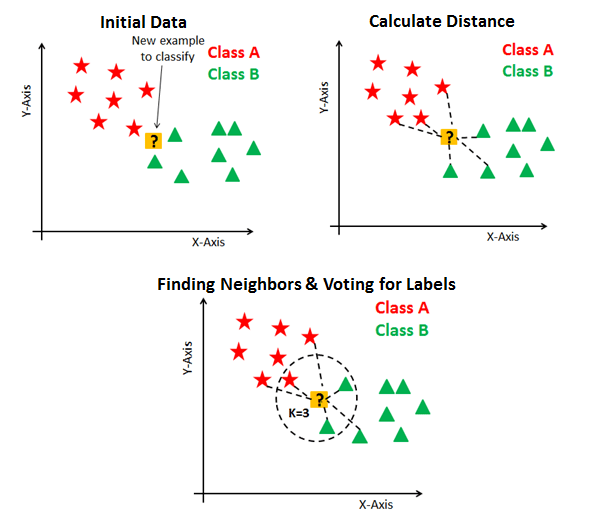

The NN classifier **does not learn a model**.
A real **training phase is not performed**.

##Voronoy diagram
The result of its behavior is to partition the feature space into a Voronoi diagram.
Between each pair of samples, and equally spaced between the two, a decision boundary is build. The new samples inside a patch are those having as nearest neighbor the sample around which the patch is built, and thus will be assigned with the label of that sample.

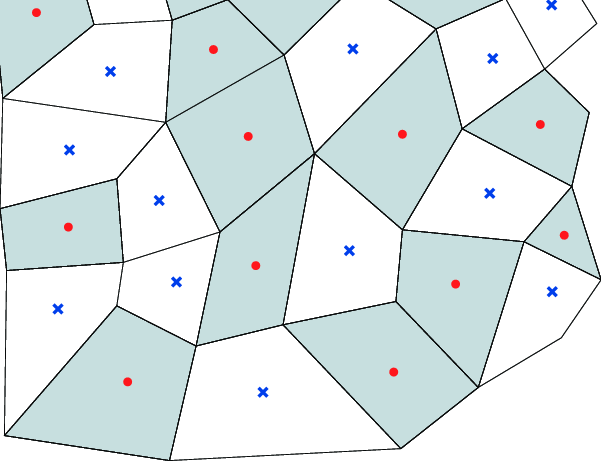

#Preliminary operations

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
os.chdir('drive/MyDrive/ML/Exercise01_NN')
!ls

FileNotFoundError: ignored

#Dataset

In [18]:
data = pd.read_excel('train.xlsx') 
# Il modulo Panda di python permette di leggere i dati da un excel, data è di tipo DataFrame (500,3)

In [19]:
data

,Height,Weight,Gender
0,167.322552,66.721073,Female
1,176.237039,90.126539,Male
2,157.066226,62.095317,Female
3,166.154081,56.195554,Female
4,163.698905,73.829070,Male
...,...,...,...
495,157.864909,53.400680,Female
496,167.747919,60.810740,Female
497,179.886436,88.224527,Male
498,170.051961,75.564389,Male


##Dataset split

In [20]:
data_train = data[:300]
data_val = data[300:]
print('Training set samples:  ', len(data_train))
print('Validation set samples:', len(data_val))
# Eseguo una divisione del dataset in relazione 60% 40% tra training set e validation set

Training set samples:   300
Validation set samples: 200


##Training set visualization

Text(0.5, 0, 'Weight [Kg]')

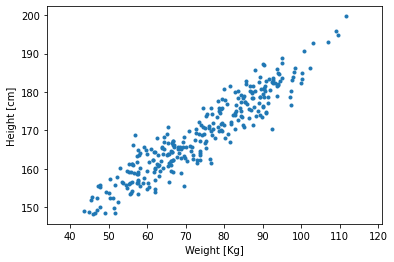

In [21]:
h, w, g = data_train['Height'], data_train['Weight'], data_train['Gender']
# Divido il training set in vettori colonne dividendo le features

plt.scatter(w, h, marker='.') # genera un grafico di dispersione dei set riportati
plt.axis('equal')
plt.ylabel('Height [cm]')
plt.xlabel('Weight [Kg]')

In [ ]:
np.corrcoef(h, w) 
# Restituisce la correlazione tra i dati. E' chiaro che nella matrice risultante
# La correlazione tra h e sè stesso è unitaria.

array([[1.        , 0.93709919],
       [0.93709919, 1.        ]])

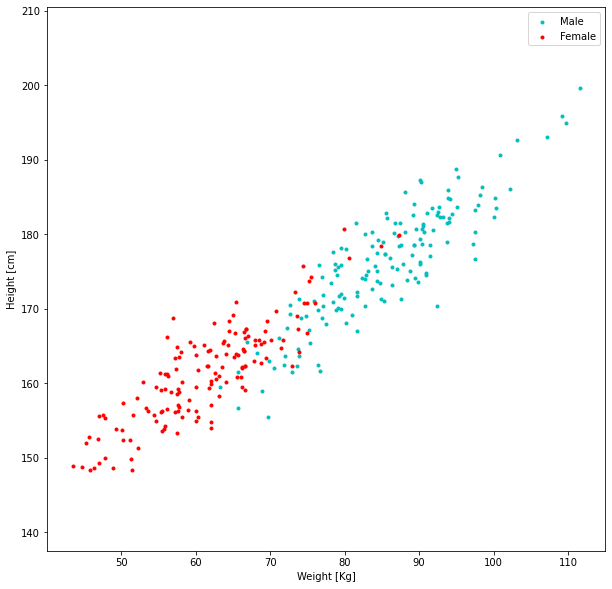

In [ ]:
plt.figure(figsize=(10,10)) # ingrandisce le dimensioni della figura
plt.scatter(w[g=='Male'], h[g=='Male'], marker='.', c='c') 
plt.scatter(w[g=='Female'], h[g=='Female'], marker='.', c='r')
# Marco i maschi in azzurro e le femmine in rosso.
plt.axis('equal')
plt.ylabel('Height [cm]')
plt.xlabel('Weight [Kg]')
plt.legend(['Male', 'Female'])


##Data and labels

In [ ]:
X_train = np.stack((w, h), 1) # creo un vettore righe di coppie (w,h) per ogni campione.
y_train = np.array(g) # vettore righe in cui inserisco il sesso.

In [ ]:
X_val = np.stack((data_val['Weight'], data_val['Height']), 1) # ripeto per il validation set
y_val = np.array(data_val['Gender'])

In [ ]:
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)

Training data shape: (300, 2)
Training labels shape: (300,)


In [ ]:
X_train[:2] # Posso visualizzare i primi due campioni in coppie (w,h)

array([[ 66.72107336, 167.32255246],
       [ 90.12653941, 176.23703878]])

In [ ]:
y_train[:2] # nel set Y sono contenuti i sessi.

array(['Female', 'Male'], dtype=object)

#Nearest Neighbors classifier

In [ ]:
def get_NN(X_train_, y_train_, x_test_): # Calcolo il NN
  dist_xy = (X_train_ - x_test_)**2 # Calcola la distanza tra l'elemento da testare e tutti gli elementi del training set
  dist = dist_xy.sum(axis=1) # sommo w e h ottenendo un vettore riga con tutti i valori
  index = np.argmin(dist) # scelgo il minimo (L'indice del minimo)
  y_test_estimated_ = y_train_[index] # il risultato è dato dal sesso del minimo cioè il più vicino
  return y_test_estimated_

# Permette di eseguire il calcolo su più elementi per questioni di efficienza
def get_NN_batch(X_train_, y_train_, X_test_, verbose=False):
  dist_xy = (np.expand_dims(X_train_, 0) - np.expand_dims(X_test_, 1))**2
  dist = dist_xy.sum(axis=2)
  indexes = np.argmin(dist, axis=1)
  y_test_estimated_ = y_train_[indexes]
  if verbose:
    print('Train shape:', X_train_.shape,
          '\nTest shape:', X_test_.shape,
          '\nx-y distance shape:', dist_xy.shape,
          '\nOutput shape:', y_test_estimated_.shape, '\n'
          )
  
  return y_test_estimated_

##Decision boundary

In [29]:
# Aggiungo un margine di 0.5 per visualizzare meglio i dati
x0_min, x0_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
x1_min, x1_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5  
h = .5  # step size in the mesh
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

In [31]:
xx0[:3, :3]

array([[42.98773787, 43.48773787, 43.98773787],
       [42.98773787, 43.48773787, 43.98773787],
       [42.98773787, 43.48773787, 43.98773787]])

In [32]:
xx1[:3, :3]

array([[147.80288715, 147.80288715, 147.80288715],
       [148.30288715, 148.30288715, 148.30288715],
       [148.80288715, 148.80288715, 148.80288715]])

In [33]:
def plot_NN_decision_boundaries(X_train_, y_train_, X_test_=None, y_test_=None):
  yy = get_NN_batch(X_train_, y_train_, np.stack((xx0.ravel(), xx1.ravel()), 1)) == 'Female'
  
  plt.figure(figsize=(10,10))
  yy = yy.reshape(xx0.shape)
  plt.contourf(xx0, xx1, yy, alpha=0.8) #cmap=cm

  if X_test_ is None and y_test_ is None:
    X_test_, y_test_ = X_train_, y_train_
  plt.scatter(X_test_[y_test_=='Male', 0],   X_test_[y_test_=='Male', 1],   marker='.', c='c')
  plt.scatter(X_test_[y_test_=='Female', 0], X_test_[y_test_=='Female', 1], marker='.', c='r')
  plt.axis('equal')
  plt.ylabel('Height [cm]')
  plt.xlabel('Weight [Kg]')

##Accuracy

In [42]:
def compute_NN_accuracy(X_train_, y_train_, X_test_, y_test_, verbose=False):
  y_test_estimated_ = get_NN_batch(X_train_, y_train_, X_test_, verbose)
  y_test_estimated_;
  correct_decisions = y_test_estimated_ == y_test_
  accuracy = correct_decisions.mean() * 100.
  return accuracy

## Using all training samples

Train shape: (300, 2) 
Test shape: (200, 2) 
x-y distance shape: (200, 300, 2) 
Output shape: (200,) 

Accuracy:  87.5


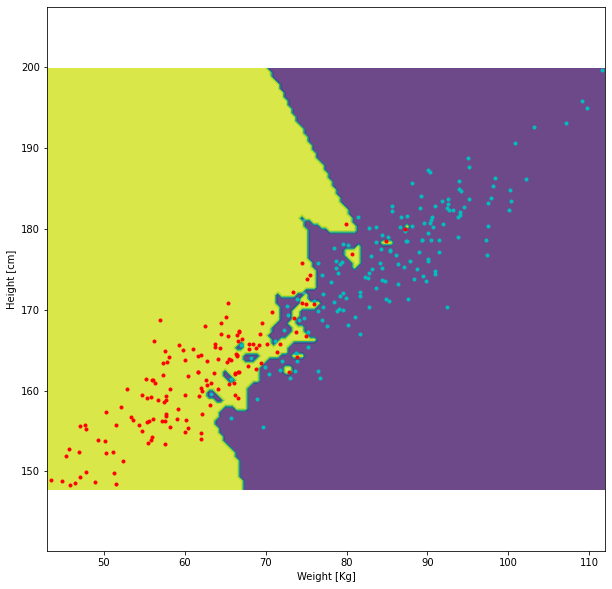

In [43]:
plot_NN_decision_boundaries(X_train, y_train)
accuracy = compute_NN_accuracy(X_train, y_train, X_val, y_val, verbose=True)
print("Accuracy: ", accuracy)

##Using 5 training samples

90.0

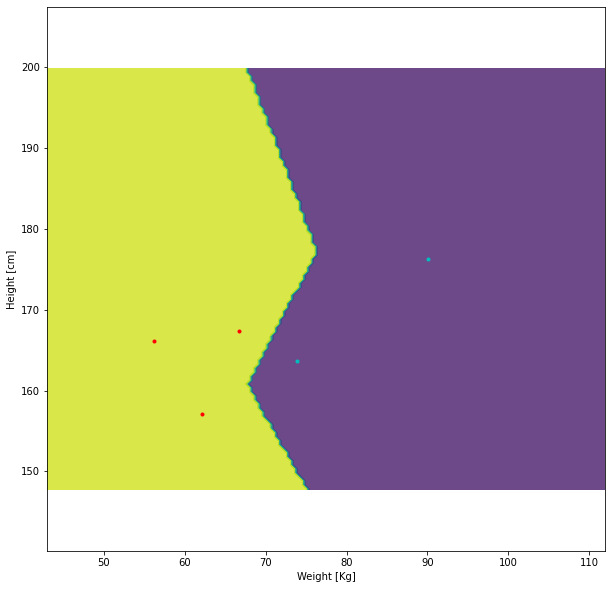

In [44]:
plot_NN_decision_boundaries(X_train[:5], y_train[:5])
compute_NN_accuracy(X_train[:5], y_train[:5], X_val, y_val)

##Using 5 random samples

train_indexes: [232  41 196 209  40]


88.5

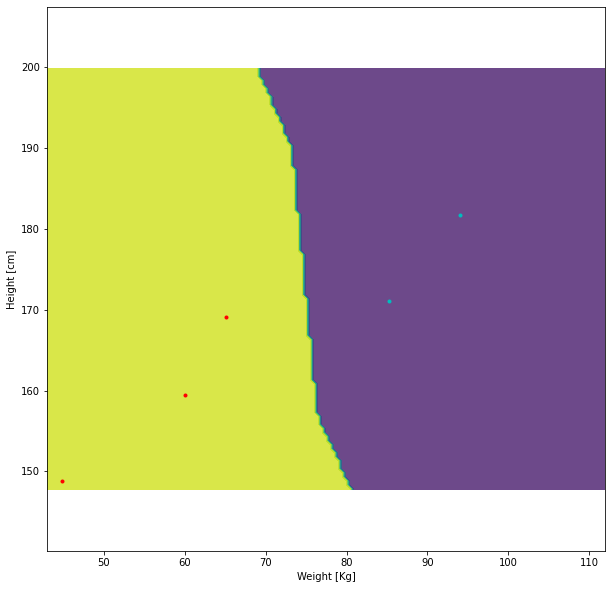

In [47]:
train_indexes = np.random.randint(0, len(y_train), 5)
print('train_indexes:', train_indexes)
plot_NN_decision_boundaries(X_train[train_indexes], y_train[train_indexes])
compute_NN_accuracy(X_train[train_indexes], y_train[train_indexes], X_val, y_val)

##Synthetic data augmentation

In [54]:
n_samples = 20
X_small, y_small = X_train[:n_samples], y_train[:n_samples]
X_aug = y_aug = None

88.5

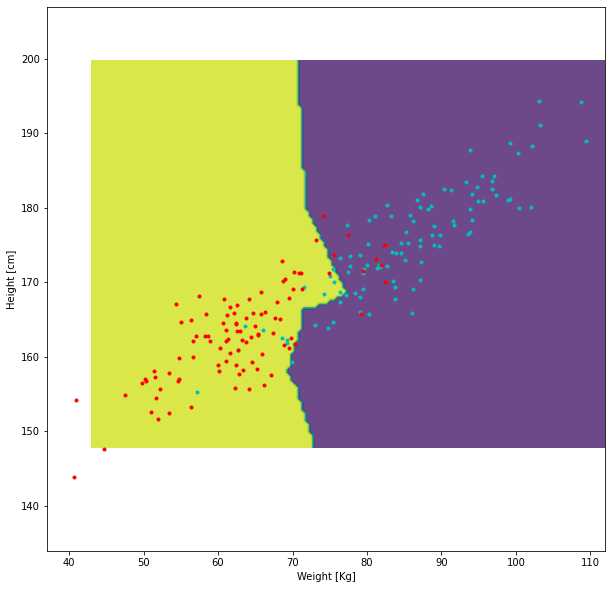

In [56]:
plot_NN_decision_boundaries(X_small, y_small, X_val, y_val)
compute_NN_accuracy(X_small, y_small, X_val, y_val)

In [57]:
sigma_aug = 1

X_add = X_small + sigma_aug * np.random.randn(*X_small.shape)
y_add = y_small.copy()
if X_aug is None:
  X_aug, y_aug = X_add, y_add
else:
  X_aug, y_aug = np.concatenate((X_aug, X_add)), np.concatenate((y_aug, y_add))

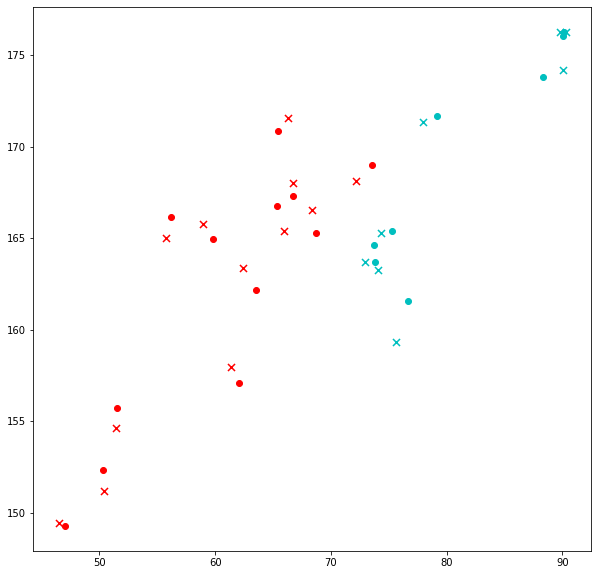

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(X_small[y_small=='Male', 0], X_small[y_small=='Male', 1], c='c')
plt.scatter(X_small[y_small=='Female', 0], X_small[y_small=='Female', 1], c='r')
plt.scatter(X_aug[y_aug=='Male', 0], X_aug[y_aug=='Male', 1], c='c', marker='x', s=50)
plt.scatter(X_aug[y_aug=='Female', 0], X_aug[y_aug=='Female', 1], c='r', marker='x', s=50)


87.5

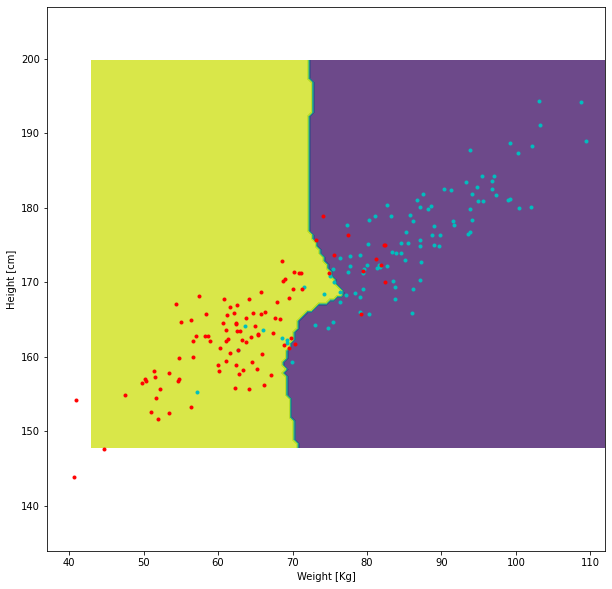

In [59]:
plot_NN_decision_boundaries(np.concatenate((X_small, X_add)), np.concatenate((y_small, y_add)), X_val, y_val)
compute_NN_accuracy(np.concatenate((X_small, X_add)), np.concatenate((y_small, y_add)), X_val, y_val)

##SMOTE augmentation

A widely used synthetic data augmentation is the SMOTE algorithm.
The key idea is to exploit the nearest neighbors of the same class to generate new samples. These synthetic samples lye on the lines connecting two close original samples of the same class.

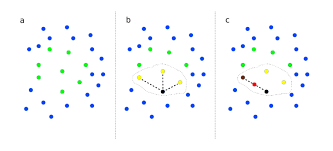


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (20) in class Male will be larger than the number of samples in the majority class (class #Female -> 12)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (20) in class Female will be larger than the number of samples in the majority class (class #Female -> 12)
  f"After over-sampling, the number of samples ({n_samples})"


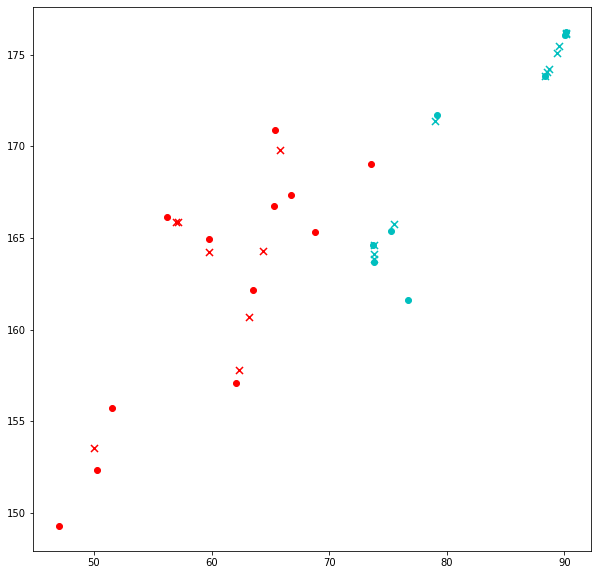

In [ ]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE(sampling_strategy={'Male': 20, 'Female': 20}, k_neighbors=3)
X_small_add, y_small_add = resampler.fit_resample(X_small, y_small)
X_add, y_add = X_small_add[n_samples:], y_small_add[n_samples:]

plt.figure(figsize=(10,10))
plt.scatter(X_small[y_small=='Male', 0], X_small[y_small=='Male', 1], c='c')
plt.scatter(X_small[y_small=='Female', 0], X_small[y_small=='Female', 1], c='r')
plt.scatter(X_add[y_add=='Male', 0], X_add[y_add=='Male', 1], c='c', marker='x', s=50)
plt.scatter(X_add[y_add=='Female', 0], X_add[y_add=='Female', 1], c='r', marker='x', s=50)

88.5

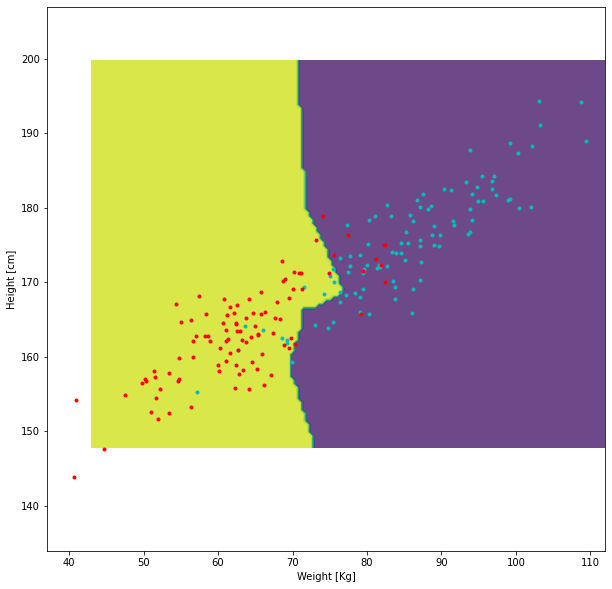

In [ ]:
plot_NN_decision_boundaries(np.concatenate((X_small, X_add)), np.concatenate((y_small, y_add)), X_val, y_val)
compute_NN_accuracy(
    np.concatenate((X_small, X_add)),
    np.concatenate((y_small, y_add)),
    X_val,
    y_val)

##Cross-validation

In [ ]:
def k_fold_cross_val(X_train_, y_train_, K=10):
  fold_indexes = np.random.randint(0, K, len(y_train_))
  fold_accuracy = [compute_NN_accuracy(X_train_[fold_indexes != k], y_train_[fold_indexes != k],
                                       X_train_[fold_indexes == k], y_train_[fold_indexes == k])
                   for k in range(K)]
  return fold_accuracy

In [ ]:
K = 10
fold_accuracy = k_fold_cross_val(
    np.concatenate((X_train, X_val)),
    np.concatenate((y_train, y_val)),
    K)
print('Per fold accuracy')
for k, acc in enumerate(fold_accuracy):
  print('- fold %2d: %0.3f' % (k, acc))
print('Average accuracy: %0.3f' % np.mean(fold_accuracy))

Per fold accuracy
- fold  0: 87.500
- fold  1: 88.235
- fold  2: 81.633
- fold  3: 91.228
- fold  4: 81.633
- fold  5: 89.796
- fold  6: 84.783
- fold  7: 91.111
- fold  8: 84.000
- fold  9: 87.500
Average accuracy: 86.742


##Test set accuracy

In [ ]:
data_test = pd.read_excel('test.xlsx')

print('Test set samples:', len(data_test))
X_test = np.stack((data_test['Weight'], data_test['Height']), 1)
y_test = np.array(data_test['Gender'])

Test set samples: 300


88.33333333333333

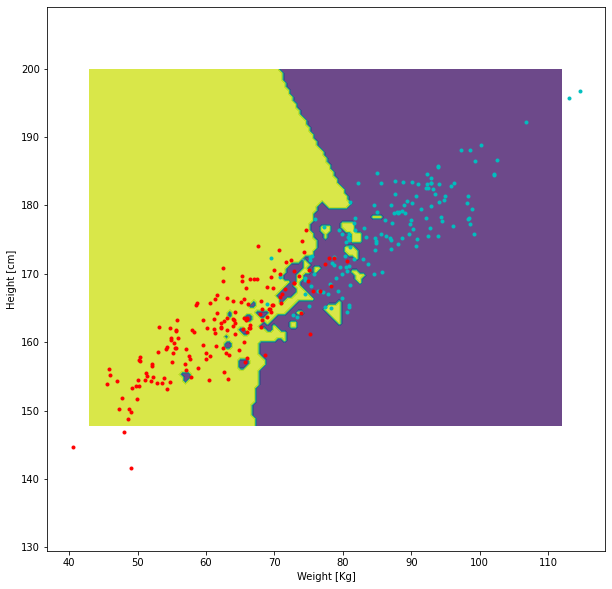

In [ ]:
plot_NN_decision_boundaries(
    np.concatenate((X_train, X_val)),
    np.concatenate((y_train, y_val)),
    X_test,
    y_test)

compute_NN_accuracy(
    np.concatenate((X_train, X_val)),
    np.concatenate((y_train, y_val)),
    X_test,
    y_test)

#Homework: K - Nearest Neighbors classifier

##The scikit-learn library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

##Decision boundaries

In [ ]:
def plot_KNN_decision_boundaries(KNN, X_train_, y_train_):
  yy = KNN.predict(np.stack((xx0.ravel(), xx1.ravel()), 1)) == 'Female'
  
  plt.figure(figsize=(10,10))
  yy = yy.reshape(xx0.shape)
  plt.contourf(xx0, xx1, yy, alpha=0.8) #cmap=cm

  plt.scatter(X_train_[y_train_=='Male', 0],   X_train_[y_train_=='Male', 1],   marker='.', c='c')
  plt.scatter(X_train_[y_train_=='Female', 0], X_train_[y_train_=='Female', 1], marker='.', c='r')
  plt.axis('equal')
  plt.ylabel('Height [cm]')
  plt.xlabel('Weight [Kg]')

##Accuracy

In [ ]:
def compute_KNN_accuracy(KNN, X_test_, y_test_):
  y_val_estimated_ = KNN.predict(X_test_)
  accuracy = (y_val_estimated_ == y_test_).mean() * 100.
  return accuracy

##Using all training samples

88.0

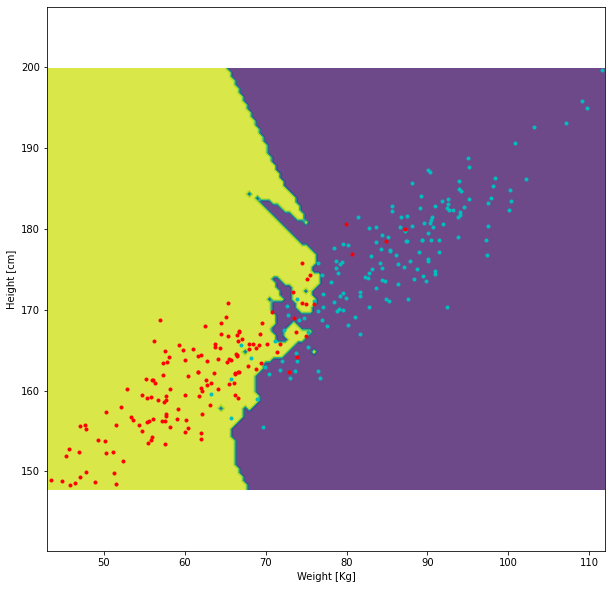

In [ ]:
K = 3
KNN = KNeighborsClassifier(K)
KNN.fit(X_train, y_train)
plot_KNN_decision_boundaries(KNN, X_train, y_train)
compute_KNN_accuracy(KNN, X_val, y_val)

##Using the first 5 training samples

90.0

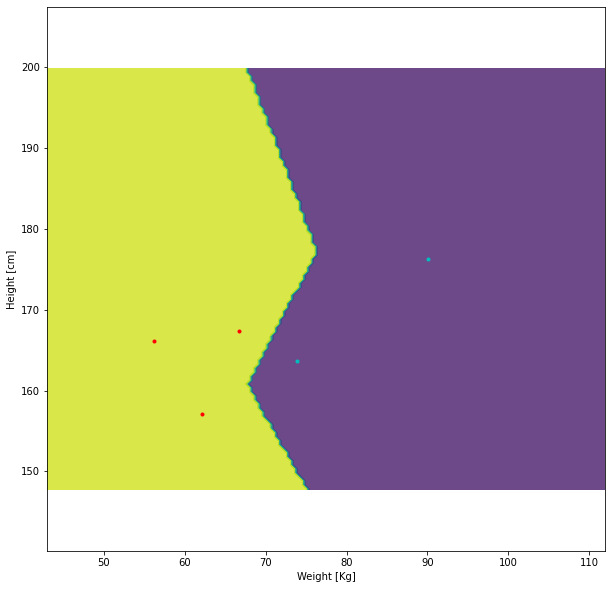

In [ ]:
train_indexes = np.array(range(5))

KNN = KNeighborsClassifier(1)
KNN.fit(X_train[train_indexes], y_train[train_indexes])
plot_KNN_decision_boundaries(KNN, X_train[train_indexes], y_train[train_indexes])
compute_KNN_accuracy(KNN, X_val, y_val)

##Using 5 random samples

88.0

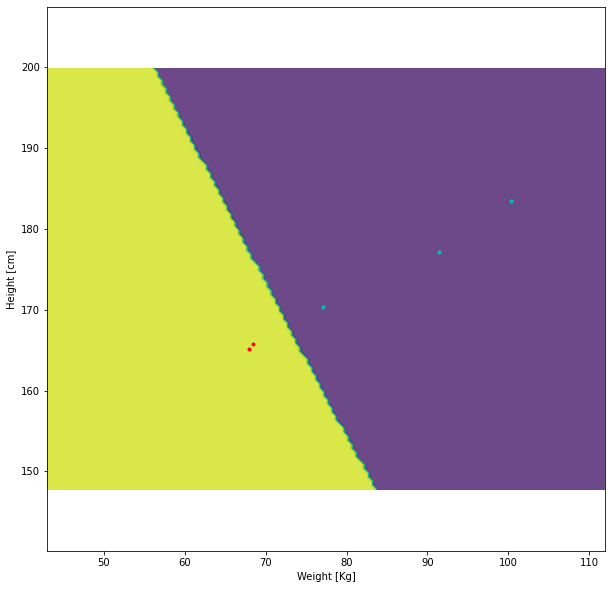

In [ ]:
train_indexes = np.random.randint(0,len(y_train), 5)

KNN = KNeighborsClassifier(1)
KNN.fit(X_train[train_indexes], y_train[train_indexes])
plot_KNN_decision_boundaries(KNN, X_train[train_indexes], y_train[train_indexes])
compute_KNN_accuracy(KNN, X_val, y_val)